In [120]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np

# Считывание данных

In [121]:
with (open('set_1.csv') as fset1, 
      open('set_2.csv') as fset2, 
      open('set_3.csv') as fset3):
          
    set1, set2, set3 = map(lambda string: list(map(float, string.split(','))), [fset1.read(), fset2.read(), fset3.read()])

# Математическое ожидание

Математическое ожидание (МО) характеризует среднее взвешенное
значение случайной величины.

$$ m_x = M[X] = \sum_{i=1}^{n} x_i \cdot p_i $$

In [122]:
def calculate_mean(values):
    counter = Counter(values)
    mean = sum([k * v / len(values) for k, v in counter.items()])
    
    return mean

# Дисперсия

Дисперсия случайной величины есть математическое ожидание квадрата
соответствующей центрированной случайной величины.
Она характеризует степень разброса значений случайной величины
относительно ее математического ожидания, т.е. ширину диапазона значений.

$$ D[X] = M[x^2] - m_x^2 $$

In [123]:
def calculate_variance(values):
    variance = calculate_mean([v ** 2 for v in values]) - calculate_mean(values) ** 2

    return variance

# Среднее квадратичное отклонение 

Средним квадратическим отклонением (СКО) СВ X называется
характеристика

$$ σ_x = σ[X] = \sqrt{(D[X])} $$

СКО измеряется в тех же физических единицах, что и СВ, и характеризует
ширину диапазона значений СВ.

In [124]:
def calculate_deviation(values):
    return math.sqrt(calculate_variance(values))

# Построение исходных данных

In [125]:
def remove_outliers(values):
    deviation = calculate_deviation(values)

    return list(filter(lambda x: -3 * deviation < x < 3 * deviation, values))

In [126]:
set1, set2, set3 = map(remove_outliers, [set1, set2, set3])

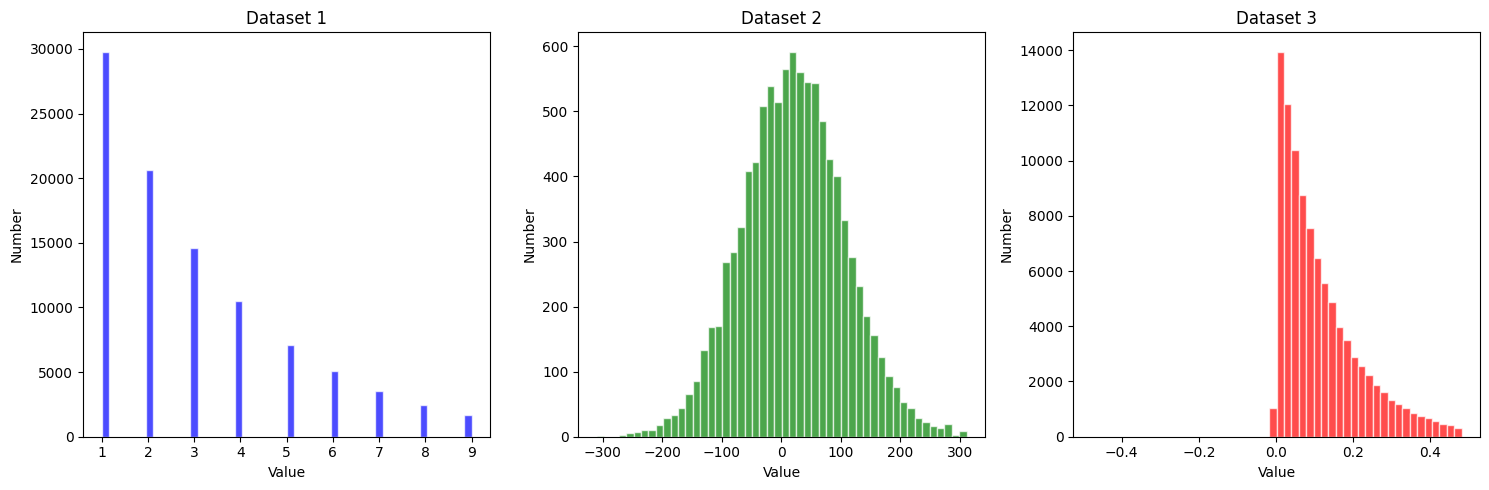

In [127]:
plt.figure(figsize=(15, 5))
colors = ['blue', 'green', 'red']

for i, dataset in enumerate([set1, set2, set3]):
    plt.subplot(1, 3, i + 1)
    plt.hist(dataset, bins= 50, color=colors[i], edgecolor='white', alpha=0.7)
    plt.title(f'Dataset {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Number')
    
plt.tight_layout()
plt.show()


# Распределения

## Геометрическое

Дискретная случайная величина X имеет геометрическое распределение, если вероятности ее возможных значений 0, 1, .., k, ...
определяются так:

$$ p_k = P \{X = k\} = q^k \cdot p $$
$$ M[x] = \frac{1}{p}, D[X] = \frac{q}{p^2} $$

Пусть производится некоторый опыт, в котором некоторое событие
появляется с вероятностью p. Опыты производятся последовательно, до
наступления события. Случайная величина X, равная числу неудачных
опытов, имеет геометрическое распределение.

In [128]:
def geometric(mean, deviation, n):
    try:
        p = mean / deviation ** 2
        return list(np.random.geometric(p, size=n))
    except:
        return []

## Биноминальное

Дискретная случайная величина X имеет биноминальное распределение, если ее закон распределения описывается формулой Бернулли:
$$ P\{X = k\} = P(n,k) = C_n^k \cdot p^k \cdot q^{n-k} $$

$$ M[x] = n\cdot p, D[x] = n\cdot p \cdot q $$

На практике биноминальное распределение возникает при следующих
условиях. Пусть производится серия из n испытании, в каждом из которых
некоторое событие появляется с вероятностью р. Случайная величина X,
равная числу наступлений события (k) в n опытах, имеет биноминальное
распределение.

In [129]:
def binomial(mean, deviation, n):
    try:
        p = deviation ** 2 / mean
        n = round(mean / p)
        return list(np.random.binomial(n, p, size=n))
    except:
        return []

## Пуассона

Соотношениями, описывающими биноминальное распределение, удобно пользоваться в тех случаях, если величина и достаточно мала, а р велико.

Теорема: Если, n → ∞, а p → 0 так, что np = α (0 < α < ∞), то
$$ P\{X = k\} = C_n^k \cdot p^k \cdot q^{n-k} = \frac{α^k}{k!}\cdot e^{-α} $$

$$ M[X] = α, D[X] = α $$


In [130]:
def poisson(mean, deviation, n):
    lambda_ = mean
    return list(np.random.poisson(lambda_, size=n))

## Равномерное

$$
\begin{align*}
\frac{a+b}{2} = a_x \\
\frac{b-a}{2\sqrt{3}} = σ_x 
\end{align*}
$$

In [131]:
def uniform(mean, deviation, n):
    a = mean - math.sqrt(3) * deviation
    b = mean + math.sqrt(3) * deviation

    values = [random.uniform(a, b) for _ in range(n)]

    return values

## Нормальное

In [132]:
def normal(mean, deviation, n):
    return [random.normalvariate(mean, deviation) for _ in range(n)]

## Экспоненциальное

In [133]:
def exponential(mean, deviation, n):
    return [random.expovariate(1 / mean) for _ in range(n)]

# Получение МО и СКО

In [134]:
means = list(map(calculate_mean, [set1, set2, set3]))
deviations = list(map(calculate_deviation, [set1, set2, set3]))

# Распределения

In [135]:
N = 10000

distributions = [
    [geometric(m, d, N), binomial(m, d, N), poisson(m, d, N), 
     uniform(m, d, N), normal(m, d, N), exponential(m, d, N)]
    for m, d in zip(means, deviations)
]

dist_names = ['Geometric', 'Binomial', 'Poisson', 'Uniform', 'Normal', 'Exponential']

# Построение

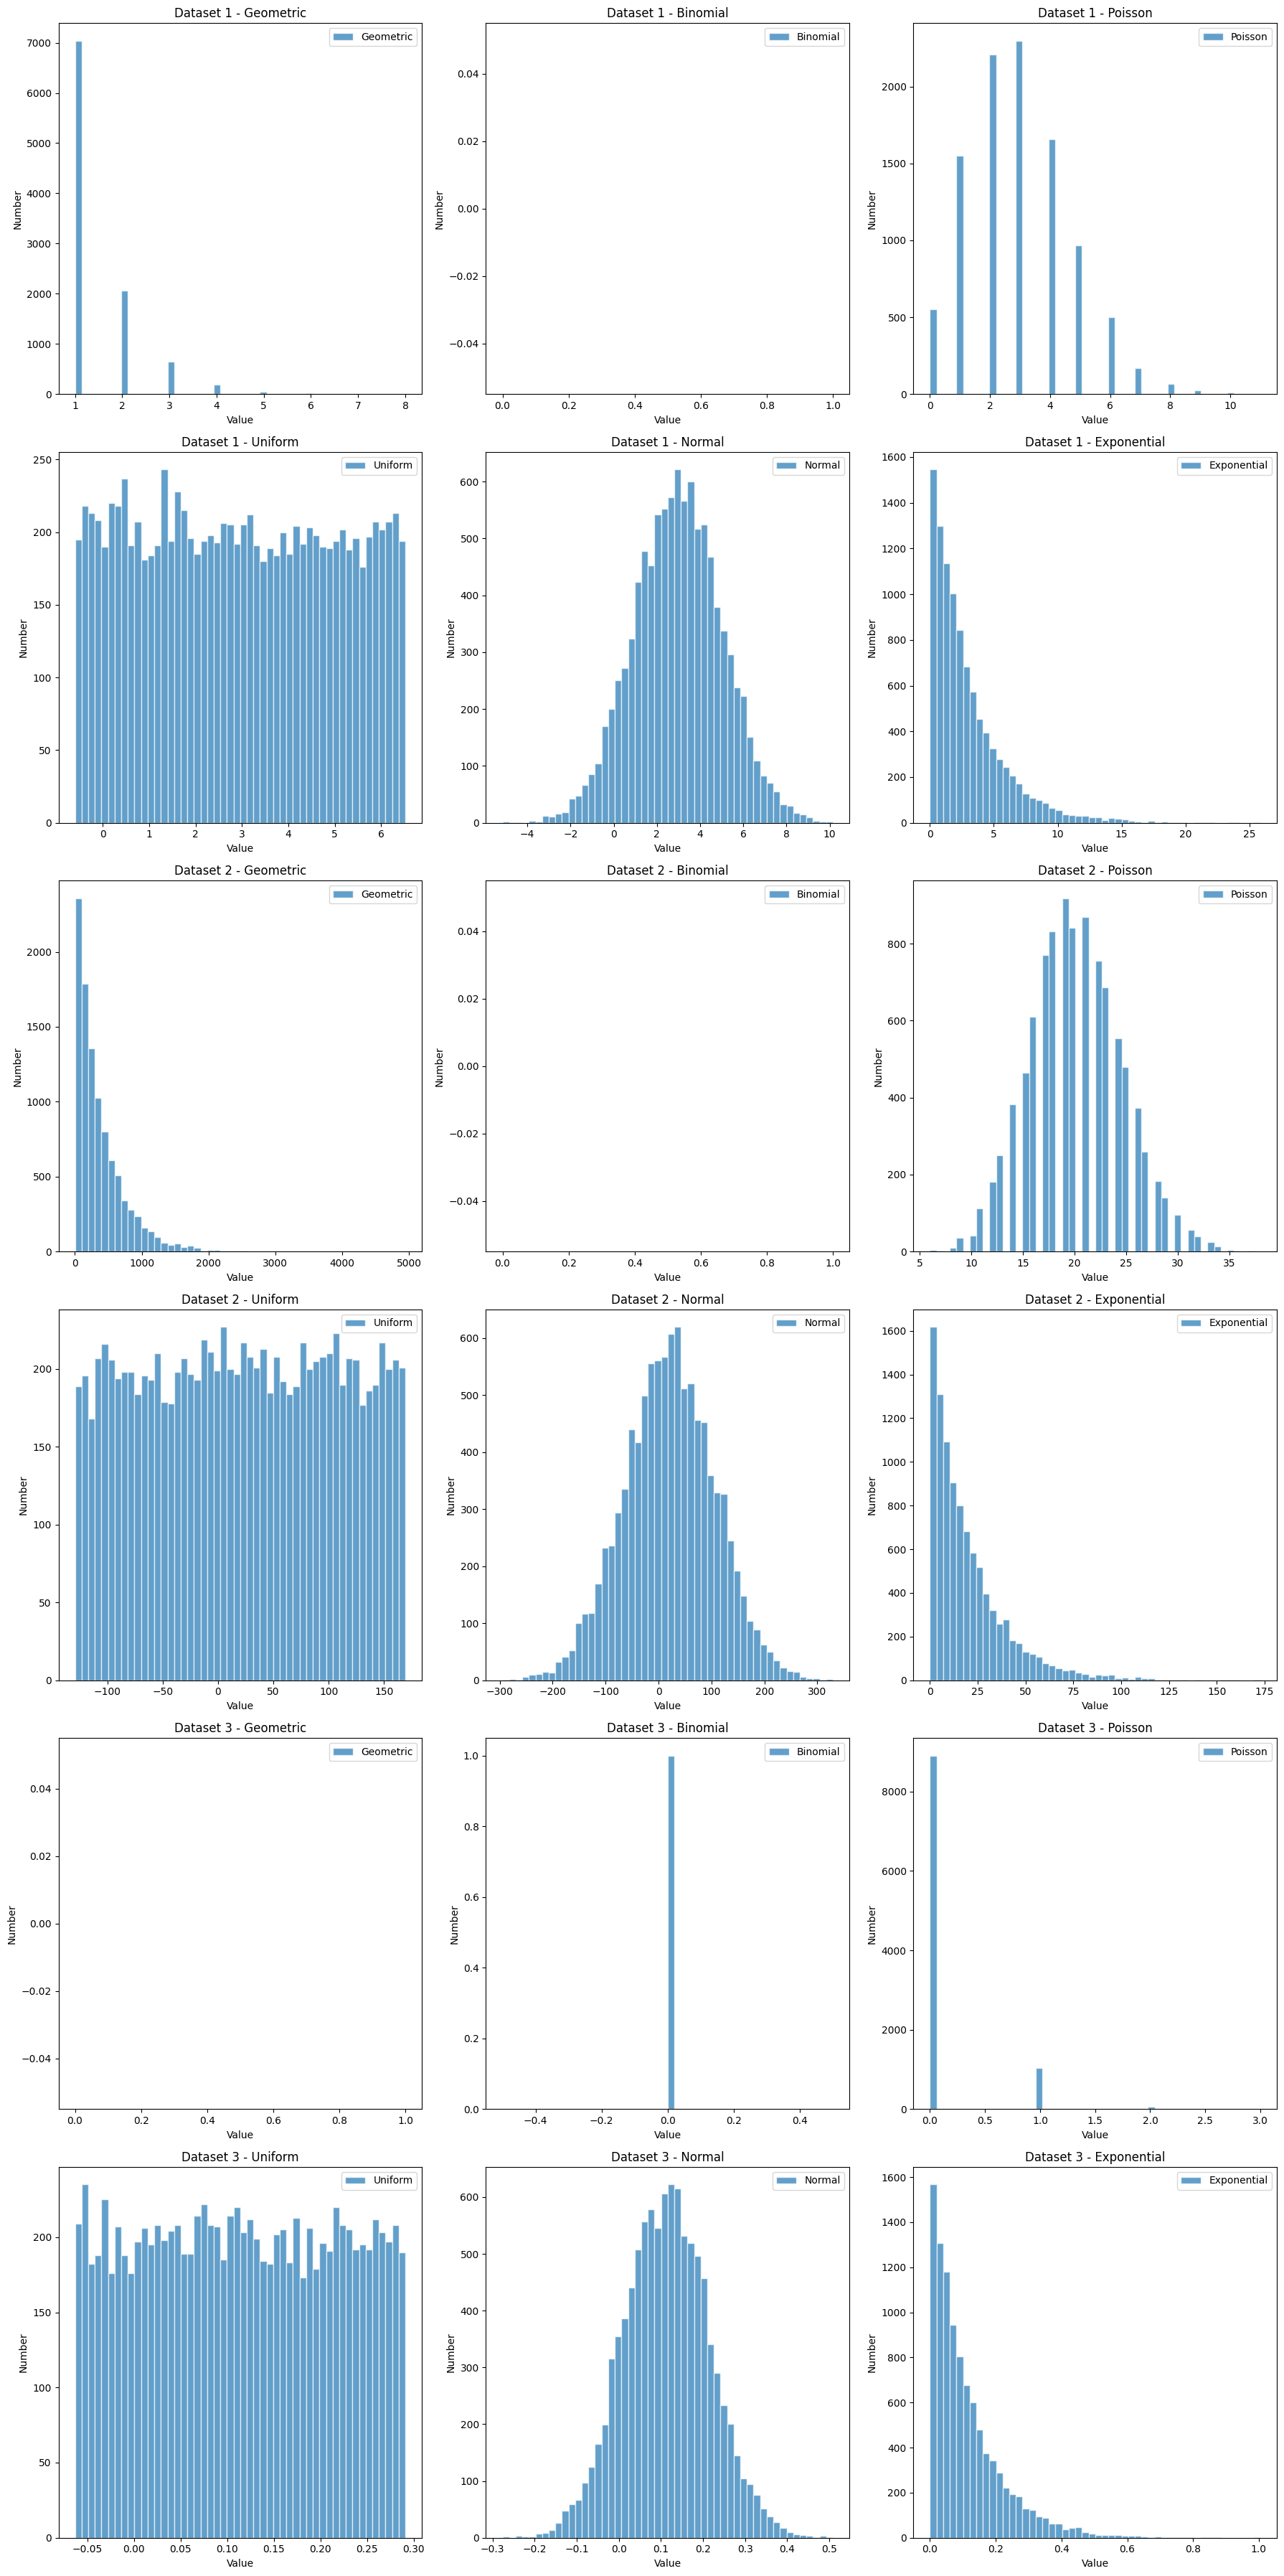

In [136]:
plt.figure(figsize=(18, 36))

for i, distribution in enumerate(distributions):
    for j in range(len(dist_names)):
        plt.subplot(6, 3, i * 6 + j + 1)
        plt.hist(distribution[j], bins= 50, edgecolor='white', alpha=0.7, label=dist_names[j])
        plt.title(f'Dataset {i + 1} - {dist_names[j]}')
        plt.xlabel('Value')
        plt.ylabel('Number')
        plt.legend()

plt.tight_layout()
plt.show()